#  024 Image display : Answers to exercises

#### Exercise 1

* Plot the first datasets in `data_MCD15A3H` as subplots in a 2 x 2 shape.

Hint: Use a loop for the keys of `data_MCD15A3H`. Set up the 2 x 2 subplots with:

    fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
    axs = axs.flatten()
    
then you can refer to the subplot axes as `ax[0]`, `ax[1]`, `ax[2]` and `ax[3]` when you loop over the keys. Don't forget to increase `x_size,y_size` appropriately.

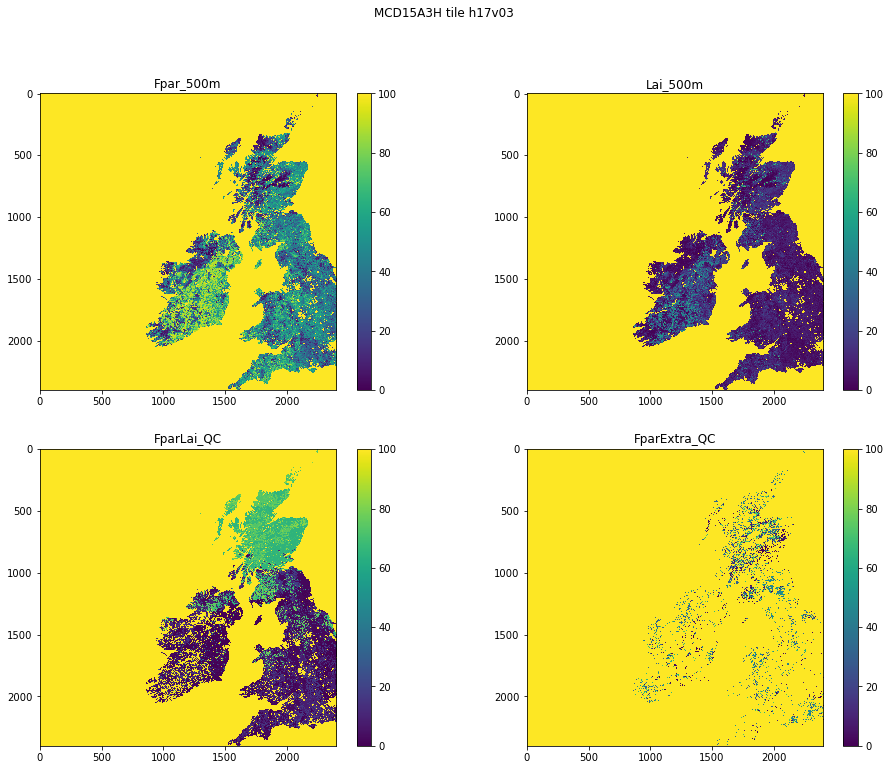

In [4]:
# ANSWER
# Plot the first datasets in `data_MCD15A3H` as subplots in a 2 x 2 shape.

import matplotlib.pyplot as plt
from  geog0111.modisUtils import getModisTiledata

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
    'year'       : 2019,
    'doy'        : 41
}

data_MCD15A3H = getModisTiledata(verbose=False,timeout=300,**kwargs)

# this is most neatly done with a 
# loop over the keys we want
# Notice [:4] in array selection of the first 4 items
keys = list(data_MCD15A3H.keys())[:4]

name = f'{kwargs["product"]} tile {kwargs["tile"]}'
# plot size : play with these to get the right size for your plot
x_size,y_size = 16,12
shape = (2,2)

fig, axs = plt.subplots(*shape,figsize=(x_size,y_size))

# Hint: Use a loop for the keys of `data_MCD15A3H`. Set up the 2 x 2 subplots with:
#
#    fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
#    axs = axs.flatten()   
# then you can refer to the subplot axes as 
# `ax[0]`, `ax[1]`, `ax[2]` and `ax[3]` when you 
# loop over the keys. 
# Don't forget to increase `x_size,y_size` appropriately.

if shape[0] == 1 and shape[1] == 1:  
    axs = [axs]
else:
    axs = axs.flatten()# set the figure title
fig.suptitle(name)

# the loop
for i,k in enumerate(keys):
    # plot image data
    im = axs[i].imshow(data_MCD15A3H[k],\
                   vmin=0,vmax=100,\
                   interpolation='nearest')
    axs[i].set_title(k)
    fig.colorbar(im, ax=axs[i])

#### Exercise 2

* write a function called `im_display` that takes as input:
    * a data dictionary
    * a list of keywords of datasets to plot
    * optionally:
        * a title
        * a colourmap name
        * lower and upper limits for plot data (vmin, vmax)
        * x_size,y_size
        * subplots shape : e.g. (2,2)

You should assume some default values for the optional items if not given. For the subplots shape, assume it is `(n,1)` where `n` is the length of the keyword list.

You should set the default values of `vmin` and `vmax` to `None`, as this just then takes the dataset default minimum and maximum.

Your code should be well-documented.

* test your code

Note that you will have to experiment a bit with the `x_size,y_size` values to get a good plot. It is not easy to automate that.

In [6]:
# ANSWER
# write a function called im_display that takes as input:
#   a data dictionary
#   a list of keywords of datasets to plot

import matplotlib.pyplot as plt
from  geog0111.modisUtils import getModisTiledata

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
    'year'       : 2019,
    'doy'        : 41
}

data_MCD15A3H = getModisTiledata(verbose=False,timeout=300,**kwargs)# first,load the dataset

# optionally:
#   a title
#   a colourmap name
#   lower and upper limits for plot data (vmin, vmax)
#   x_size,y_size
#   subplots shape : e.g. (2,2)


# You should assume some default values for the optional 
# items if not given. For the subplots shape, assume it is `(n,1)` 
# where `n` is the length of the keyword list.

# You should set the default values of `vmin` and `vmax` to `None`, 
# as this just then takes the dataset default minimum and maximum.
def im_display(data,names,\
               title=None,colourmap=None,\
               vmin=None,vmax=None,\
               x_size=12,y_size=8,shape=None):
    '''
    Image display utility 
    
    a function called im_display that takes as input:
        data  :  a data dictionary
        names :  a list of keywords of datasets to plot

        optionally:
            title=None       : a title
            colourmap=None   : a colourmap name
            vmin,vmax        : lower and upper limits for plot data
            x_size=16        : plot x size * shape[0]
            y_size=12        : plot y size * shape[1]
            shape=None       : subplots shape : e.g. (2,2)
    '''
    # Your code should be well-documented.
    
    # sort out options
    n = len(names)
    if shape == None:
        shape = (n,1)
        
    # adaptive size
    x_size = x_size * shape[0]
    y_size = y_size * shape[1]

    
    fig, axs = plt.subplots(*shape,figsize=(x_size,y_size))
    if shape[0] == 1 and shape[1] == 1:  
        axs = [axs]
    else:
        axs = axs.flatten()
        
    # switch off ticks
    plt.setp(axs, xticks=[], yticks=[])

    # set the figure title
    # Note sub-plots have titles too, set in the loop
    if title:
        fig.suptitle(title)

    # loop over names (titles for sub-plots)
    for i,k in enumerate(names):
        # i is an index (from the enumerate) so
        # we can refer to axs[i] as the sub-plot i
        # k is the value of names[i] which is the title
        # for plot i
        
        # plot image data with vmin and vmax setting 
        # the upper and lower thresholds
        # Use interpolation="nearest" for clearest data plot
        im = axs[i].imshow(data[k],\
                   vmin=vmin,vmax=vmax,\
                   interpolation='nearest')
        
        # optionally set a colurmap
        # be careful of UK/US spellings!
        if colourmap:
            im.set_cmap(colourmap)
            
        # set title to sub-plot i
        axs[i].set_title(k)
        
        # colourbar for sub-plot i
        fig.colorbar(im, ax=axs[i])    
        

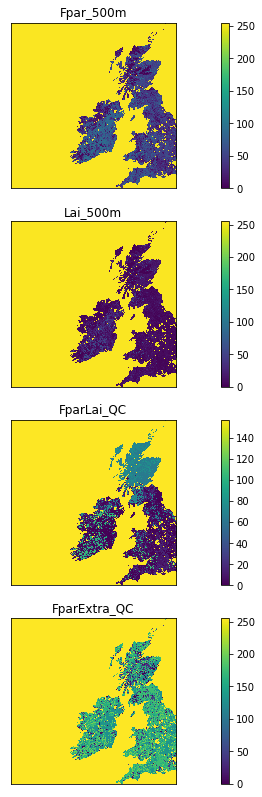

In [7]:
# test
import matplotlib.pyplot as plt
from  geog0111.modisUtils import getModisTiledata

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
    'year'       : 2019,
    'doy'        : 41
}

data_MCD15A3H = getModisTiledata(verbose=False,timeout=300,**kwargs)
# first,load the dataset

# this is mnost neatly done with a 
# loop over the keys we want
keys = list(data_MCD15A3H.keys())[:4]

name = f'{kwargs["product"]} tile {kwargs["tile"]}'

im_display(data_MCD15A3H,keys,\
               title=None,colourmap=None,\
               x_size=4,y_size=14,shape=(4,1))

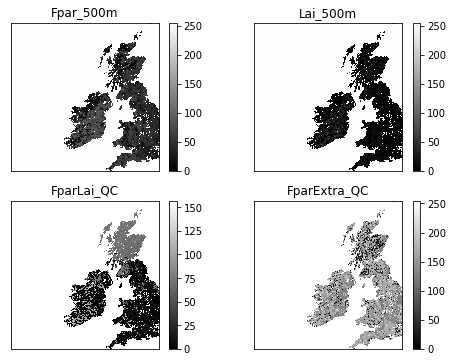

In [8]:
im_display(data_MCD15A3H,keys,\
               title=None,colourmap='gray',\
               x_size=4,y_size=3,shape=(2,2))

#### Exercise 3

* Write a function called `plot_lc` that takes as input modis land cover dataset and plots the associated land cover map
* You might use `x_size,y_size` as optional inputs to improve scaling
* Show the function operating

In [14]:
# ANSWER
# this is a little long-winded, but just wraps up the codes above
import matplotlib
import matplotlib.patches
import matplotlib.pyplot as plt
import pandas as pd

def plot_lc(data,x_size=12,y_size=12):
    '''
    takes as input MODIS LC dataset
    plots the associated land cover map

    x_size,y_size as optional inputs
    '''
    lc_Type1 = pd.read_csv('data/LC_Type1_colour.csv')

    # generate matplotlib cmap and norm objects from these

    # get the LC codes, colours and classes
    # from LC_Type1_class and LC_Type1_colour
    cmap = matplotlib.colors.\
            ListedColormap(list(lc_Type1['colour']))
    norm = matplotlib.colors.\
            BoundaryNorm(list(lc_Type1['code']), len(lc_Type1['code']))

    # set up the legend
    legend_labels = dict(zip(list(lc_Type1['colour']),\
                             list(lc_Type1['class'])))
    patches = [matplotlib.patches.Patch(color=c, label=l)
               for c,l in legend_labels.items()]
    fig, axs = plt.subplots(1,figsize=(x_size,y_size))
    im = axs.imshow(data,cmap=cmap,norm=norm,interpolation='nearest')
    plt.legend(handles=patches,
              bbox_to_anchor=(1.4, 1),
              facecolor="white")

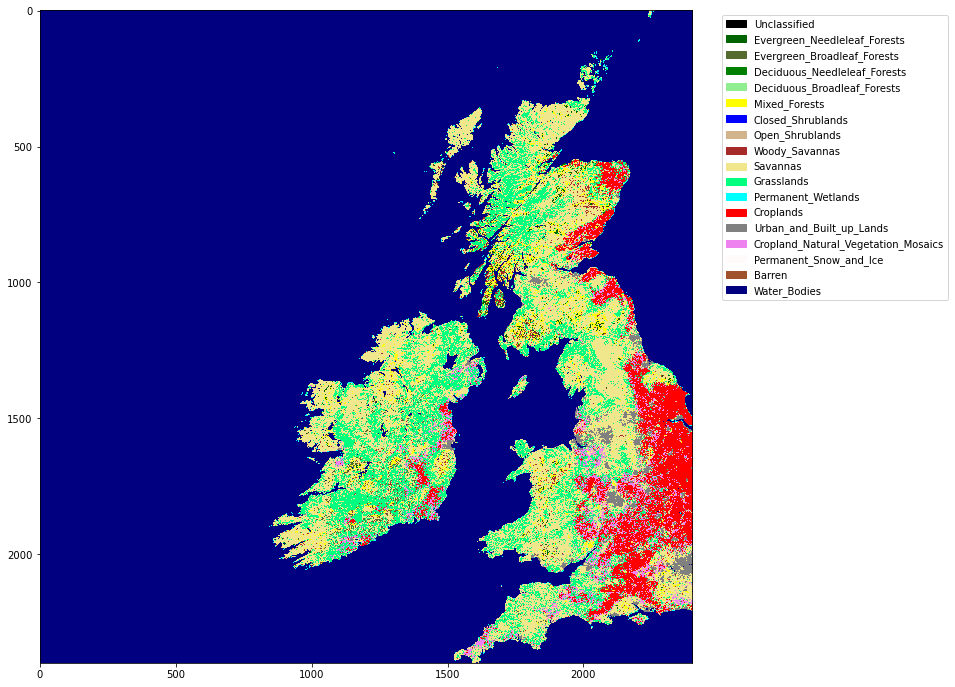

In [15]:
from  geog0111.modisUtils import getModisTiledata
# ANSWER


kwargs = {
    'product'    : 'MCD12Q1',
    'tile'       : 'h17v03',
    'year'       : 2019,
    'doy'        : 1
}

data_MCD12Q1 = getModisTiledata(verbose=False,timeout=300,**kwargs)

# the data we want here
plot_lc(data_MCD12Q1['LC_Type1'])